In [ ]:
install.packages('party')
library(party)

In [2]:
mydata <- read.csv(file.choose())
ls()

In [ ]:
head(mydata)
str(mydata)

In [14]:
mydata$NSP <- as.factor(mydata$NSP) # convert the NSP into factor level
str(mydata$NSP)

 Factor w/ 3 levels "1","2","3": 2 1 1 1 1 3 3 3 3 3 ...


In [10]:
# feature selection
X <- mydata[,c(1:3)]
head(X)
Y <- mydata$NSP
head(Y)

,LB,AC,FM
,<int>,<dbl>,<dbl>
1,120,0.000000000,0
2,132,0.006379585,0
3,133,0.003322259,0
4,134,0.002560819,0
5,132,0.006514658,0
6,134,0.001049318,0


[1] 2 1 1 1 1 3
Levels: 1 2 3

In [16]:
# Partition data into training and TEST/validation datasets
set.seed(100)
# Sample.split(dataset,training set ratio)
pred <- sample(2, nrow(mydata), replace = TRUE, prob = c(0.7,0.3))
train <- mydata[pred == 1,] # all rows in pre column where value is 1
test <- mydata[pred == 2,] # all rows in pre column where value is 2

In [ ]:
# ctree(Y~X,dataset,controls = ctree_control(mincriterion & minsplit))
mytree1 <- ctree(NSP ~ LB + AC + FM, data = train, controls = ctree_control(mincriterion = 0.9, minsplit = 50))
print(mytree)
plot(mytree)

In [ ]:
mytree2 <- ctree(NSP ~ ASTV + MSTV, data = train, controls = ctree_control(mincriterion = 0.9, minsplit = 50))
plot(mytree1)
predict(mytree,test,type="prob") # Prediction

           
testmisclas   1   2   3
          1 470  36  41
          2  40  60  12
          3   0   0   3


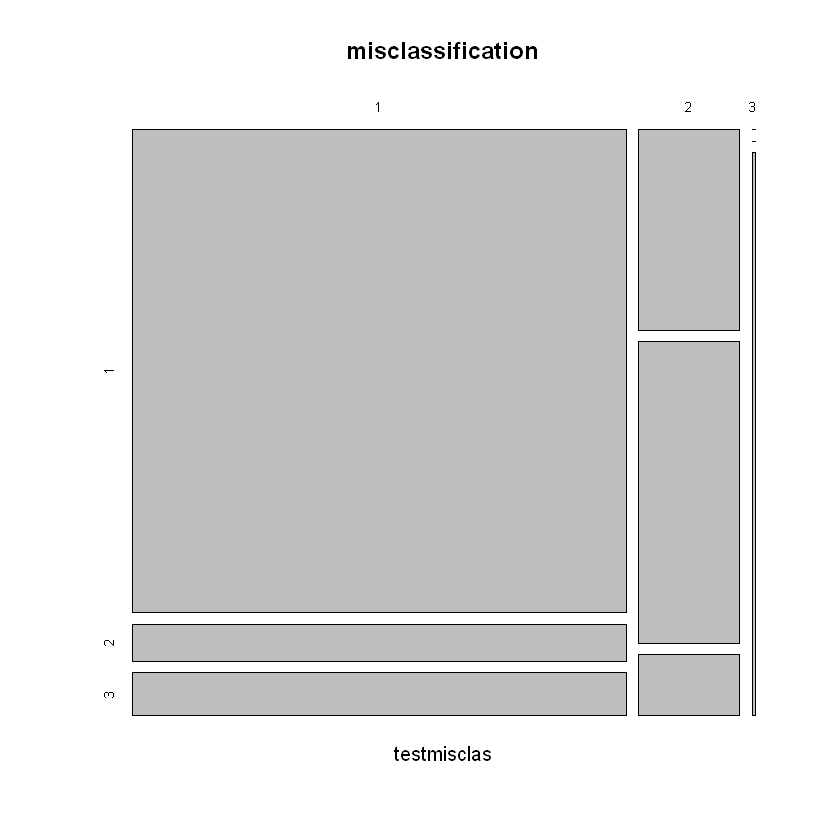

In [23]:
# Misclassification error with test set
testmisclas <- predict(mytree, newdata = test) # predict(model_variable,testset)
misclassification <- table(testmisclas, test$NSP)
print(misclassification)
plot(misclassification)

In [24]:
# Accuracy calculation
Accuracy <- sum(diag(misclassification))/sum(misclassification)
Accuracy
Error<-1-Accuracy
Error

[1] 0.805136

[1] 0.194864